Mean Squared Error: 56871865115896.41
The MSE of linear regression model is: 63365636630614.836
            Player name  Real salary  Predicted salary          Net
0     Tyrese Haliburton      4215120       31655337.20  27440217.20
219        Desmond Bane      2130240       28417203.56  26286963.56
1             Ja Morant     12119440       33378788.01  21259348.01
2        Darius Garland      8920794       29176442.42  20255648.42
220        Tyrese Maxey      2726880       22458427.80  19731547.80
221         Skylar Mays       116574       18811764.59  18695190.59
222      Keldon Johnson      3873024       22285103.86  18412079.86
223       Devin Vassell      4437000       22719567.20  18282567.20
224        Bones Hyland      2201520       19529441.47  17327921.47
225        Jordan Poole      3901399       20789299.98  16887900.98
3           Evan Mobley      8478720       25264589.75  16785869.75
4       Zion Williamson     13534817       30225642.06  16690825.06
5           LaMelo B

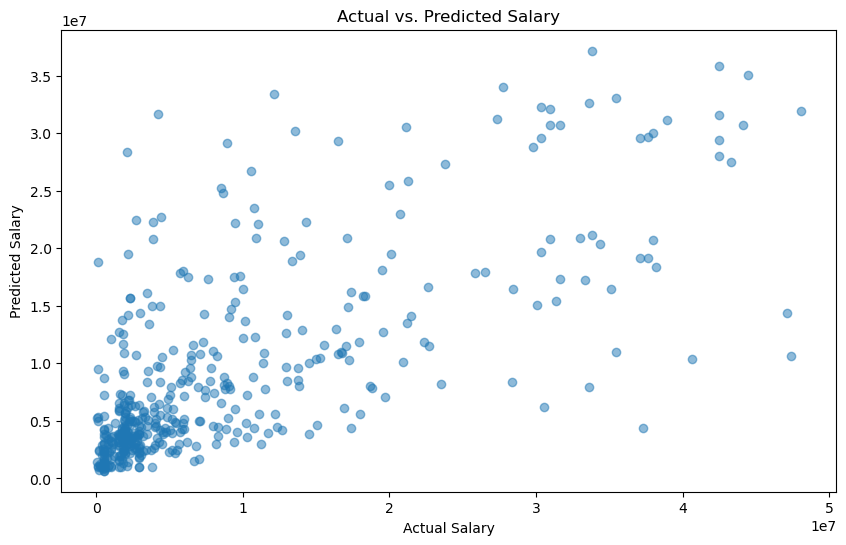

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

data = pd.read_csv('nba_2022-23_all_stats_with_salary.csv')
data['Position'] = data['Position'].replace('PG-SG', 'PG')
data['Position'] = data['Position'].replace('SF-SG', 'SF')
data['Position'] = data['Position'].replace('SG-PG', 'PG')
data['Position'] = data['Position'].replace('SF-PF', 'PF')
data['Position'] = data['Position'].replace('PG', 1)
data['Position'] = data['Position'].replace('SG', 2)
data['Position'] = data['Position'].replace('SF', 3)
data['Position'] = data['Position'].replace('PF', 4)
data['Position'] = data['Position'].replace('C', 5)
data = data[data['GP'] >= 5]

player_names = data['Player Name']  # Extract player names
data.fillna(0, inplace=True)

data_copy = data.copy()
X = data_copy.drop(columns=['Salary', 'Team', 'Player Name', 'Unnamed: 0', 'Age'])
y = data_copy['Salary']
X_train, X_test, y_train, y_test, names_train, names_test = train_test_split(X, y, player_names, test_size=0.5, random_state=1)

#TESTING DIFFERENT MODELS
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
predictions_b = {'Player name': names_test, 'Real salary': y_test, 'Predicted salary': y_pred}
predictions_df_b = pd.DataFrame(predictions_b)
predictions_df_b['Net'] = predictions_df_b['Predicted salary'] - predictions_df_b['Real salary']

lr = LinearRegression().fit(X_train, y_train)
lr_predicitons = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, lr_predicitons)
print(f'The MSE of linear regression model is: {mse_lr}')

#PREDICTING ON THE ENTIRE DATASET
rf_2 = RandomForestRegressor(random_state=1)
rf_2.fit(X_test, y_test)  # Retraining on the entire dataset
predictions_2 = rf_2.predict(X_train)
predictions_a = {'Player name': names_train, 'Real salary': y_train, 'Predicted salary': predictions_2}
predictions_df = pd.DataFrame(predictions_a)
predictions_df['Net'] = predictions_df['Predicted salary'] - predictions_df['Real salary']

sorted_df = predictions_df.sort_values(by='Net', ascending=False)
sorted_df_b = predictions_df_b.sort_values(by='Net', ascending=False)
pred_salary_sorted = predictions_df.sort_values(by='Predicted salary', ascending=False)
pred_salary_sorted2 = predictions_df_b.sort_values(by='Predicted salary', ascending=False)

combined_df = pd.concat([sorted_df, sorted_df_b], ignore_index=True)
combined_df = combined_df.sort_values(by='Net', ascending=False)  # Sorting the combined DataFrame by 'Net'
print(combined_df.head(50))

combined_pred = pd.concat([pred_salary_sorted, pred_salary_sorted2], ignore_index=True)
combined_pred = combined_pred.sort_values(by='Predicted salary', ascending=False)  # Sorting the combined DataFrame by 'Predicted salary'
combined_pred.to_csv('combined_predictions.csv', index=False)


plt.figure(figsize=(10, 6))
plt.scatter(combined_df['Real salary'], combined_df['Predicted salary'], alpha=0.5)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary')
plt.show()

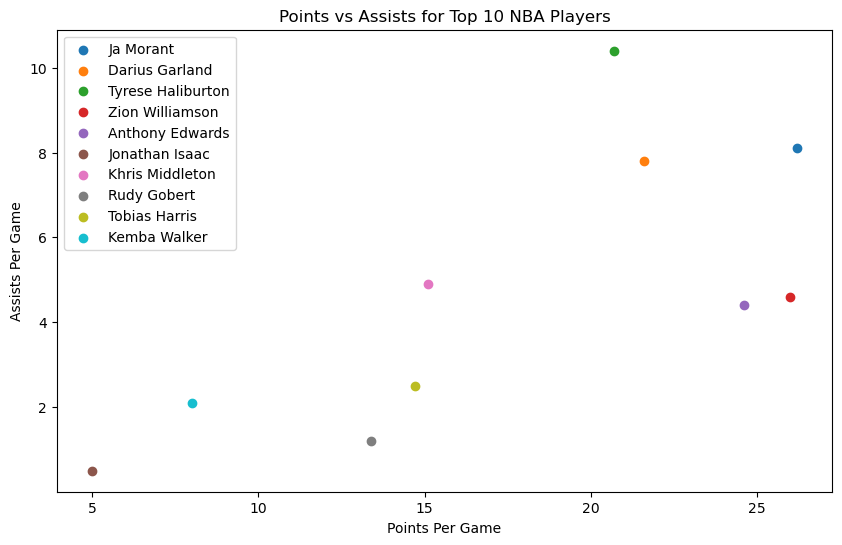

In [11]:
file_path = 'nba_2022-23_all_stats_with_salary.csv' 
nba_data = pd.read_csv(file_path)

top_10_players = [
    "Ja Morant", "Darius Garland", "Tyrese Haliburton",
    "Zion Williamson", "Anthony Edwards", "Jonathan Isaac",
    "Khris Middleton", "Rudy Gobert", "Tobias Harris", "Kemba Walker"
]

top_10_data = nba_data[nba_data['Player Name'].isin(top_10_players)]

columns_of_interest = ['Player Name', 'Salary', 'Age', 'Team', 'GP', 'MP', 'PTS', 'AST', 'STL', 'BLK', 'TOV', 'FG%', '3P%', 'FT%']
top_10_data = top_10_data[columns_of_interest]

plt.figure(figsize=(10, 6))
for player in top_10_players:
    player_data = top_10_data[top_10_data['Player Name'] == player]
    plt.scatter(player_data['PTS'], player_data['AST'], label=player)

plt.xlabel('Points Per Game')
plt.ylabel('Assists Per Game')
plt.title('Points vs Assists for Top 10 NBA Players')
plt.legend()
plt.show()


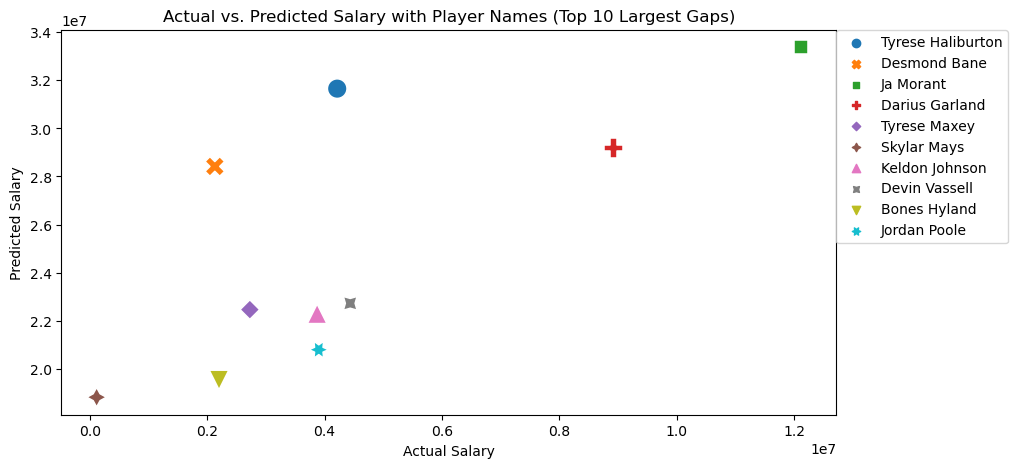

In [38]:
#Visualizing the actual salary with predicted salary
data = {
    'Player name': ["Tyrese Haliburton", "Desmond Bane", "Ja Morant", "Darius Garland", "Tyrese Maxey", 
                    "Skylar Mays", "Keldon Johnson", "Devin Vassell", "Bones Hyland", "Jordan Poole", 
                    "Evan Mobley", "Zion Williamson", "LaMelo Ball", "Cade Cunningham", "Quentin Grimes", 
                    "Immanuel Quickley", "Lauri Markkanen", "Anthony Edwards", "Jalen Green", "Isaiah Stewart"],
    'Real salary': [4215120, 2130240, 12119440, 8920794, 2726880, 116574, 3873024, 4437000, 2201520, 3901399,
                    8478720, 13534817, 8623920, 10552800, 2277000, 2316240, 16475454, 10733400, 9441840, 3433320],
    'Predicted salary': [31655337.20, 28417203.56, 33378788.01, 29176442.42, 22458427.80, 18811764.59, 22285103.86, 
                         22719567.20, 19529441.47, 20789299.98, 25264589.75, 30225642.06, 24777242.85, 26693445.77, 
                         15694940.03, 15688976.61, 29333615.18, 23540453.73, 22191965.36, 16082348.54]
}
combined_df = pd.DataFrame(data)


combined_df['Salary Gap'] = abs(combined_df['Predicted salary'] - combined_df['Real salary'])

top_10_gaps = combined_df.nlargest(10, 'Salary Gap')

plt.figure(figsize=(10, 5))
sns.scatterplot(data=top_10_gaps, x='Real salary', y='Predicted salary', hue='Player name', style='Player name', alpha=1, s=200)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary with Player Names (Top 10 Largest Gaps)')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)  
plt.show()

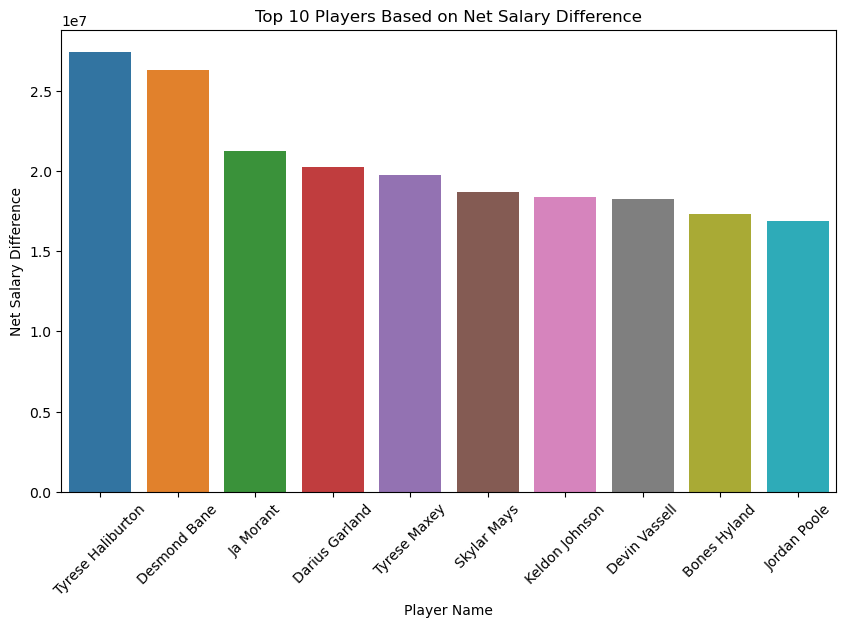

In [21]:
#Conducted a gap analysis with top10 players based on net salary differences
data = {
    'Player name': ["Tyrese Haliburton", "Desmond Bane", "Ja Morant", "Darius Garland", "Tyrese Maxey", 
                    "Skylar Mays", "Keldon Johnson", "Devin Vassell", "Bones Hyland", "Jordan Poole", 
                    "Evan Mobley", "Zion Williamson", "LaMelo Ball", "Cade Cunningham", "Quentin Grimes", 
                    "Immanuel Quickley", "Lauri Markkanen", "Anthony Edwards", "Jalen Green", "Isaiah Stewart"],
    'Net': [27440217.20, 26286963.56, 21259348.01, 20255648.42, 19731547.80, 18695190.59, 18412079.86, 
            18282567.20, 17327921.47, 16887900.98, 16785869.75, 16690825.06, 16153322.85, 16140645.77, 
            13417940.03, 13372736.61, 12858161.18, 12807053.73, 12750125.36, 12649028.54]
}
combined_df = pd.DataFrame(data)


top_10_diff = combined_df.sort_values(by='Net', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Player name', y='Net', data=top_10_diff)
plt.xticks(rotation=45)
plt.xlabel('Player Name')
plt.ylabel('Net Salary Difference')
plt.title('Top 10 Players Based on Net Salary Difference')
plt.show()


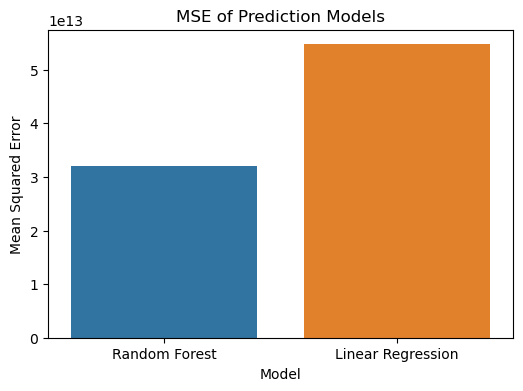

In [22]:
#Conducting MSE module to fin out which algorithm is better (linear regression or random classifier)
mse_values = {'Model': ['Random Forest', 'Linear Regression'], 'MSE': [31994349378153.9, 54735475984084.72]}
mse_df = pd.DataFrame(mse_values)
plt.figure(figsize=(6, 4))
sns.barplot(x='Model', y='MSE', data=mse_df)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('MSE of Prediction Models')
plt.show()

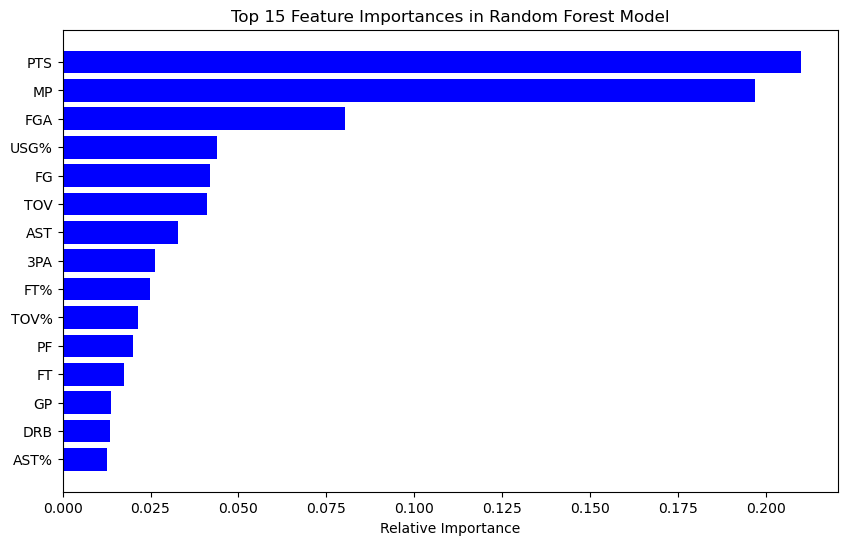

In [37]:
#Since based on the MSE model, Random Forest is a better fit, this model is based on that.
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)

importances = rf.feature_importances_

indices = np.argsort(importances)[-15:]

plt.figure(figsize=(10, 6))
plt.title('Top 15 Feature Importances in Random Forest Model')
plt.barh(range(15), importances[indices], color='b', align='center')
plt.yticks(range(15), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
